<a href="https://colab.research.google.com/github/dscoool/opencv/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 퍼셉트론 (perceptron)

## 단순 퍼셉트론 (인공 뉴런)

다수의 신호를 입력받아 하나의 신호를 출력
- 1 : 신호가 흐름 / 0 : 신호가 흐르지 않음
- 하나의 뉴런(노드)에서 다른 뉴런으로 신호에 고유한 가중치(결과에 대한 영향력 조절 요소)를 곱해서 보냄
- 활성화 : 전달 받은 신호의 총합이 임곗값 $\theta$ 를 넘을 때 1을 출력
> $y=\begin{cases}0&(w_1x_1+w_2x_2\leq\theta)\\1&(w_1x_1+w_2x_2>\theta)\end{cases}$

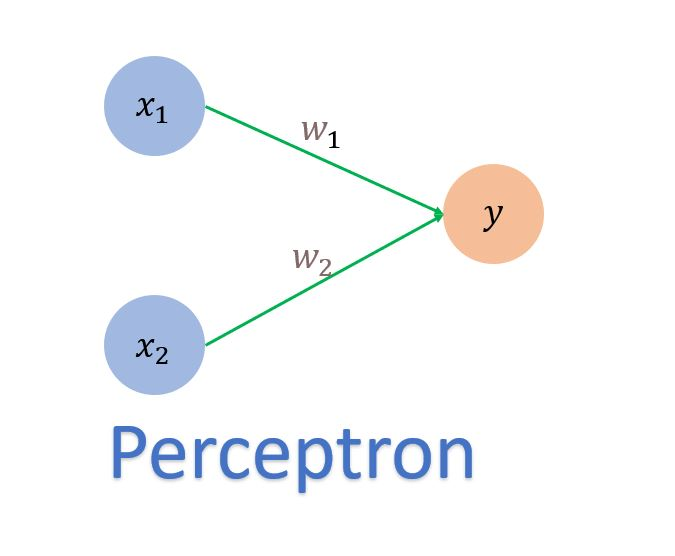

## 논리 회로
퍼셉트론 구조에서 매개변수(가중치와 임곗값) 조합으로 표현

- AND 게이트 : 2개의 입력 신호가 모두 1일 때만 출력 신호(가중 신호의 총합)가 1이 되도록 매개변수 조합을 결정
- NAND 게이트 : 2개의 입력 신호가 모두 1일 때만 출력 신호가 0이 되도록 매개변수 조합을 결정
 - AND 게이트의 출력을 뒤집은 것으로, 매개변수 조합의 부호가 반대
- OR 게이트 : 2개의 입력 신호가 모두 0일 때만 출력 신호가 0이 되도록 매개변수 조합을 결정

# 구현

In [ ]:
# AND 게이트
def AND(x1,x2):
  w1,w2,theta = 0.5,0.5,0.7
  tmp = x1*w1+x2*w2
  return int(tmp>theta)

for x in [(0,0),(0,1),(1,0),(1,1)]:
  print(f'{x} : {AND(*x)}')

(0, 0) : 0
(0, 1) : 0
(1, 0) : 0
(1, 1) : 1


편향 (bias) : 뉴런이 얼마나 쉽게 활성화(1이 출력)되는지를 의미
- $\theta$ 를 $-b$ 로 치환하여 이항
> $y=\begin{cases}0&(b+w_1x_1+w_2x_2\leq0)\\1&(b+w_1x_1+w_2x_2>0)\end{cases}$

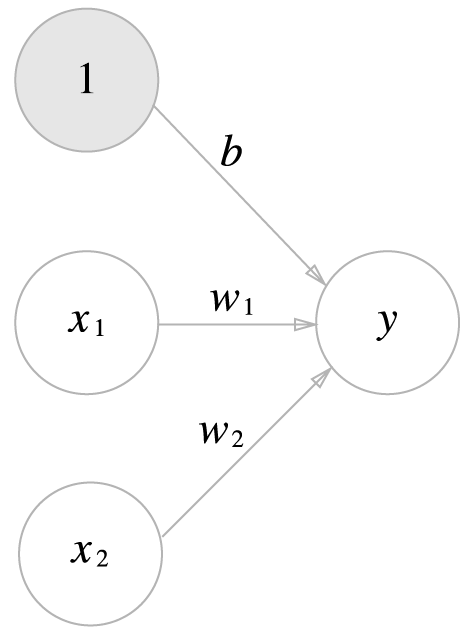

In [ ]:
import numpy as np

In [ ]:
def AND(x1,x2):
  x = np.array([x1,x2]) # 입력
  w = np.array([0.5,0.5]) # 가중치
  b = -0.7 # 편향
  tmp = np.sum(w*x)+b
  return int(tmp>0)

def NAND(x1,x2):
  x = np.array([x1,x2])
  w = np.array([-0.5,-0.5])
  b = 0.7
  tmp = np.sum(w*x)+b
  return int(tmp>0)

def OR(x1,x2):
  x = np.array([x1,x2])
  w = np.array([0.5,0.5])
  b = -0.2
  tmp = np.sum(w*x)+b
  return int(tmp>0)

for gate in [AND,NAND,OR]:
  print(gate.__name__)
  for x in [(0,0),(0,1),(1,0),(1,1)]:
    print(f'{x} : {gate(*x)}')

AND
(0, 0) : 0
(0, 1) : 0
(1, 0) : 0
(1, 1) : 1
NAND
(0, 0) : 1
(0, 1) : 1
(1, 0) : 1
(1, 1) : 0
OR
(0, 0) : 0
(0, 1) : 1
(1, 0) : 1
(1, 1) : 1


# 한계

XOR 문제 : 2개의 입력 신호가 다를 때만 출력 신호(가중 신호의 총합)가 1이 되는 매개변수 조합 ($b,w_1,w_2$)를 찾을 수 없음
- 직선 하나로 나눈 선형 영역만 분리 가능

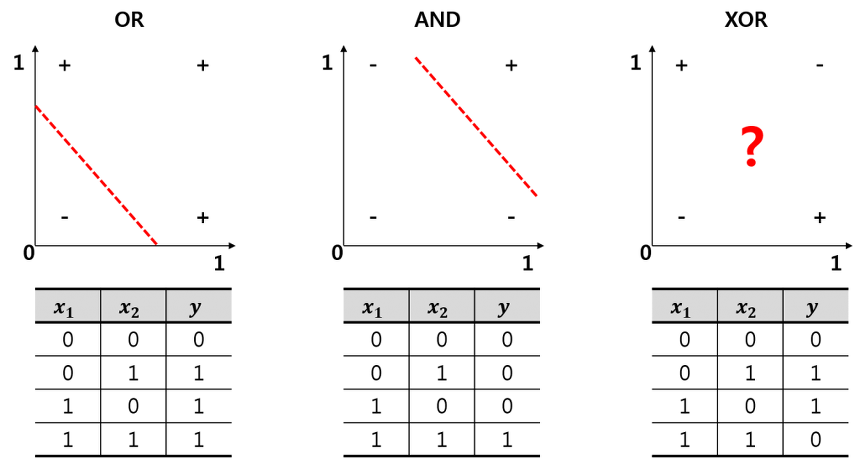

단층 퍼셉트론은 비선형 영역을 분리할 수 없으므로 XOR 게이트를 표현 불가

# 다층 퍼셉트론 (multi-layer perceptron; MLP)

XOR 게이트 : AND, NAND, OR 게이트의 조합

|x1|x2||s1|s2||y|
|:-|:-||:-|:-||:-|
|0|0||1|0||0|
|1|0||1|1||1|
|0|1||1|1||1|
|1|1||0|1||0|

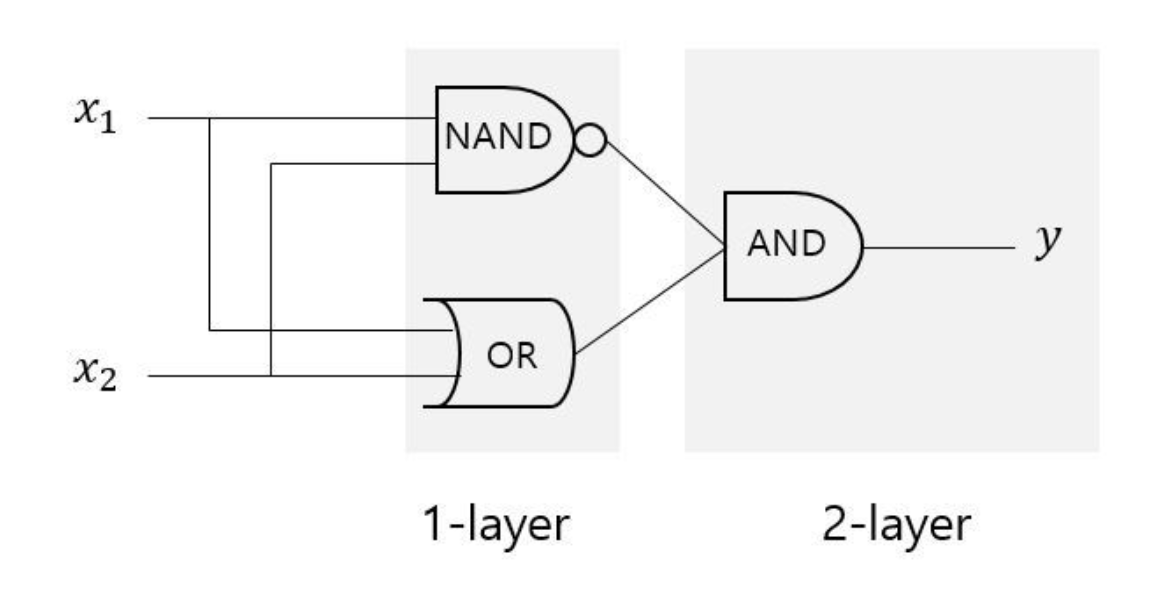

In [ ]:
def XOR(x1,x2): # 2층 퍼셉트론
  s1 = NAND(x1,x2)
  s2 = OR(x1,x2)
  return AND(s1,s2)

for x in [(0,0),(0,1),(1,0),(1,1)]:
  print(f'{x} : {XOR(*x)}')

(0, 0) : 0
(0, 1) : 1
(1, 0) : 1
(1, 1) : 0


In [ ]:
# 2층 신경망으로 구현 (CH3 참고)
def xor_net():
  network = {}
  network['W1'] = np.array([[-0.5,0.5],[-0.5,0.5]]) # 1층의 뉴런 1번 - NAND / 2번 - OR
  network['b1'] = np.array([0.7,-0.2])
  network['W2'] = np.array([[0.5],[0.5]]) # 2층(출력층)의 뉴런 - AND
  network['b2'] = np.array([-0.7])
  return network

def step(x): # 활성화 함수 : 계단 함수
  return (x>0).astype(int)

def forward(network,x):
  W1,W2 = network['W1'],network['W2']
  b1,b2 = network['b1'],network['b2']
  a1 = np.dot(x,W1)+b1
  z1 = step(a1)
  a2 = np.dot(z1,W2)+b2
  y = step(a2)
  return y

network = xor_net()
for x in [[0,0],[0,1],[1,0],[1,1]]:
  x = np.array(x)
  y = forward(network,x)
  print(f'{x} : {y}')

[0 0] : [0]
[0 1] : [1]
[1 0] : [1]
[1 1] : [0]
